In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D

import nltk

nltk.download('punkt') 


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
def split_into_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return sentences

# Example usage
text = "Hello there Dr. Oitik and M.S.C engineer bro Affif! How are you? I hope you're having a great day."
senten = split_into_sentences(text)
print(senten)

['Hello there Dr. Oitik and M.S.C engineer bro Affif!', 'How are you?', "I hope you're having a great day."]


In [3]:
import string
import re

def remove_noise(sentence):
    '''
    Removes noise from the dataset
    '''
    # Remove punctuation
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    # Remove extra spaces and newlines
    sentence = ' '.join(sentence.split())
    return sentence

def make_sentences(content):
    '''
    Takes a full story of a book or Multiple Books
    And convert it into a list of sentences.
    '''
    
    # sentences = nltk.sent_tokenize(content)
    sentences = re.split(r'[.?!;]', content)

    # Remove any leading/trailing whitespaces from each sentence, remove punctuation and
    # other noise

    # Filter out empty sentences (if any) using the filter function
    sentences = list(filter(None, sentences))
    cleaned_sentences = [remove_noise(sentence) for sentence in sentences if sentence.strip()]

    # Print the list of cleaned sentences
    return cleaned_sentences


def read_stories(paths):
    '''
    Read All the stories from a folder and return an array of sentence.
    '''
    sents = []
    for path in paths:
        # File path with Bengali characters
        file_path_bangla = path
        # Open the file using triple quotes around the file path
        with open(f"""{file_path_bangla}""", 'r', encoding='utf-8') as file:
            content = file.read()
        sent = make_sentences(content)
        sents.append(sent)
    # Convert the 2d array into 1d array
#     ments = [element for row in sents for element in row]
    return sents

In [4]:
paths = []
for dirname, _, filenames in os.walk('/kaggle/input/english-book/Salman_Rushdie_Copy'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        
sentences = read_stories(paths)
len(sentences[1])

14597

In [5]:
sentences[0][:10]

['In the day’s last light the glowing lake below the palacecity looked like a sea of molten gold',
 'A traveler coming this way at sunset—this traveler coming this way now along the lakeshore road—might believe himself to be approaching the throne of a monarch so fabulously wealthy that he could allow a portion of his treasure to be poured into a giant hollow in the earth to dazzle and awe his guests',
 'And as big as the lake of gold was it must be only a drop drawn from the sea of the larger fortune—the traveler’s imagination could not begin to grasp the size of that motherocean',
 'Nor were there guards at the golden water’s edge',
 'was the king so generous then that he allowed all his subjects and perhaps even strangers and visitors like the traveler himself without hindrance to draw up liquid bounty from the lake',
 'That would indeed be a prince among men a veritable Prester John whose lost kingdom of song and fable contained impossible wonders',
 'Perhaps the traveler surmised 

In [6]:
lenarr = []
for block in sentences:
    len_ofS = [len(sentence.split()) for sentence in block if len(sentence.split()) != 0]
    lenarr.append(len_ofS)

In [7]:
lenarr[4][:10]

[16, 5, 5, 4, 4, 10, 5, 4, 7, 7]

In [8]:
print(lenarr[4].count(0))

0


### SOME ERRORS THAT I FIND OUT

1. THERE ARE SENTENCES WITH LENGTH 0 
 - REMOVE THEM
2. THERE ARE SENTENCES WITH LENGTH 1, 2, 3
 - MAYBE THEY ARE OUTLIERS DISCUSS WITH `HARUN SIR` AND DECIDE
3. Randomly Check some values

In [9]:
rand_index = np.random.randint(0, len(sentences[0]))
print(f'''Index = {rand_index},  sentence = {sentences[0][rand_index]}, 
length = {len(sentences[0][rand_index].split())}''')

Index = 2528,  sentence = When he awoke the fog had vanished and so had the eight triremes of Admiral Andrea Doria, 
length = 17


In [10]:
c = 0
for val in sentences[0]:
    if len(val.split()) > 100:
        c += 1
print(c)

21


In [11]:
sentences[0][142]

'Ha'

In [12]:
split_into_sentences(sentences[0][158])

['“And any man who feels as I do about these words must be my drinking companion” returned the Scot']

In [13]:
sentences[0][0:5]

['In the day’s last light the glowing lake below the palacecity looked like a sea of molten gold',
 'A traveler coming this way at sunset—this traveler coming this way now along the lakeshore road—might believe himself to be approaching the throne of a monarch so fabulously wealthy that he could allow a portion of his treasure to be poured into a giant hollow in the earth to dazzle and awe his guests',
 'And as big as the lake of gold was it must be only a drop drawn from the sea of the larger fortune—the traveler’s imagination could not begin to grasp the size of that motherocean',
 'Nor were there guards at the golden water’s edge',
 'was the king so generous then that he allowed all his subjects and perhaps even strangers and visitors like the traveler himself without hindrance to draw up liquid bounty from the lake']

In [14]:
lenarr[0][:10], max(lenarr[0])

([18, 54, 35, 9, 32, 22, 27, 18, 11, 18], 183)

In [15]:
np.argmax(lenarr[0])

5031

In [16]:
def create_lenarray(path):
    '''
    Chill
    '''
    paths = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            paths.append(os.path.join(dirname, filename))

    sentences = read_stories(paths)
    lenarr = []
    for block in sentences:
        len_ofS = [len(sentence.split()) for sentence in block]
        lenarr.append(len_ofS)
    return sentences, lenarr

In [22]:
sentences1, lenarr1 = create_lenarray('/kaggle/input/english-book/Jane Austen')
sentences2, lenarr2 = create_lenarray('/kaggle/input/english-book/Defore Novels')
sentences3, lenarr3 = create_lenarray('/kaggle/input/english-book/Charles Dickens')

In [24]:
for i, val in enumerate(lenarr1):
    print(f'Length of Book {i+1} : {len(val)}')

Length of Book 1 : 8689
Length of Book 2 : 1460
Length of Book 3 : 10117
Length of Book 4 : 12868
Length of Book 5 : 5143
Length of Book 6 : 5549
Length of Book 7 : 7485


In [25]:
def plot_lines(sent1, sent2, sent3, save_path=None):
    '''
    Create a subplot with two line plots
    '''
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the first line plot in the first subplot
    axes[0].plot(range(1, len(sent1) + 1), sent1, color = 'lightcoral')
    axes[0].set_xlabel('Sentence Number')
    axes[0].set_ylabel('Sentence Length')
#     axes[0].set_title('Sentence Length in SR')

    # Plot the second line plot in the second subplot
    axes[1].plot(range(1, len(sent2) + 1), sent2)
    axes[1].set_xlabel('Sentence Number')
    axes[1].set_ylabel('Sentence Length')
#     axes[1].set_title('Sentence Length in RT')
    
    # Plot the second line plot in the second subplot
    axes[2].plot(range(1, len(sent3) + 1), sent3, color = 'lightgreen')
    axes[2].set_xlabel('Sentence Number')
    axes[2].set_ylabel('Sentence Length')
#     axes[2].set_title('Sentence Length in Sentence HA')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plot
    if save_path:
        plt.savefig(save_path)
    plt.show()

def plot_hist(sent1, sent2, sent3, save_path=None):
    '''
    Create a subplot with two line plots
    '''
    # Calculate the interquartile range (IQR)
    Q1 = np.percentile(sent1, 25)
    Q3 = np.percentile(sent1, 75)
    IQR = Q3 - Q1

    # Calculate the number of bins using the Freedman-Diaconis Rule
    N = len(sent1)
    bin_width = 2 * IQR * N**(-1/3)
    min_value = min(sent1)
    max_value = max(sent1)
    binss1 = int((max_value - min_value) / bin_width)
    
    
    # Calculate the interquartile range (IQR)
    Q1 = np.percentile(sent2, 25)
    Q3 = np.percentile(sent2, 75)
    IQR = Q3 - Q1

    # Calculate the number of bins using the Freedman-Diaconis Rule
    N = len(sent2)
    bin_width = 2 * IQR * N**(-1/3)
    min_value = min(sent2)
    max_value = max(sent2)
    binss2 = int((max_value - min_value) / bin_width)
    
    # Calculate the interquartile range (IQR)
    Q1 = np.percentile(sent3, 25)
    Q3 = np.percentile(sent3, 75)
    IQR = Q3 - Q1

    # Calculate the number of bins using the Freedman-Diaconis Rule
    N = len(sent3)
    bin_width = 2 * IQR * N**(-1/3)
    min_value = min(sent3)
    max_value = max(sent3)
    binss3 = int((max_value - min_value) / bin_width)
    
    # create a figure with two subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].hist(sent1, bins=binss1, color = 'lightcoral')
    # Set x-axis label
    axes[0].set_xlabel('Sentence Length')
    # Set y-axis label
    axes[0].set_ylabel('Frequency')
#     axes[0].set_ylim([0, 800])
    # Set title of the plot
    axes[0].set_title('Distribution of Sentence Lengths Satyajit Roy')
    
    
    axes[1].hist(sent2, bins=binss2)
    # Set x-axis label
    axes[1].set_xlabel('Sentence Length')
    # Set y-axis label
    axes[1].set_ylabel('Frequency')
    # Set title of the plot
#     axes[1].set_ylim([0, 800])
    axes[1].set_title('Distribution of Sentence Lengths Rabindranath Tagore')
    
    
    axes[2].hist(sent3, bins=binss3, color='lightgreen')
    # Set x-axis label
    axes[2].set_xlabel('Sentence Length')
    # Set y-axis label
    axes[2].set_ylabel('Frequency')
    # Set title of the plot
#     axes[1].set_ylim([0, 800])
    axes[2].set_title('Distribution of Sentence Lengths Humayun Ahmed')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    # Display the plot
    if save_path:
        plt.savefig(save_path)
    plt.show()

### Make a directory 

In [20]:
! mkdir Sentence

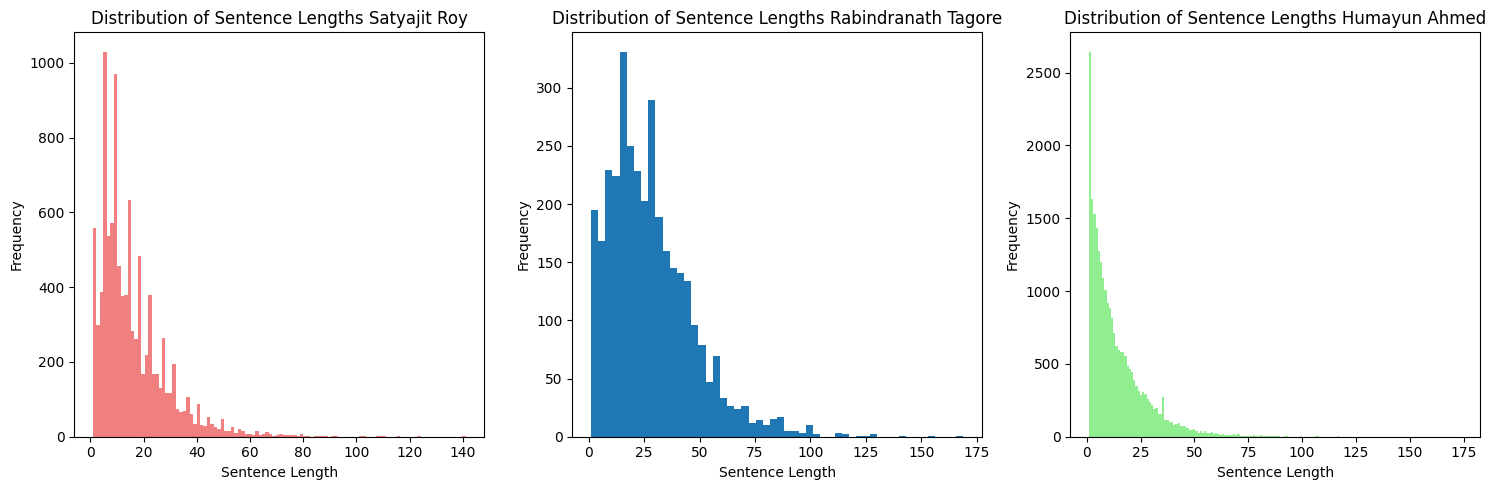

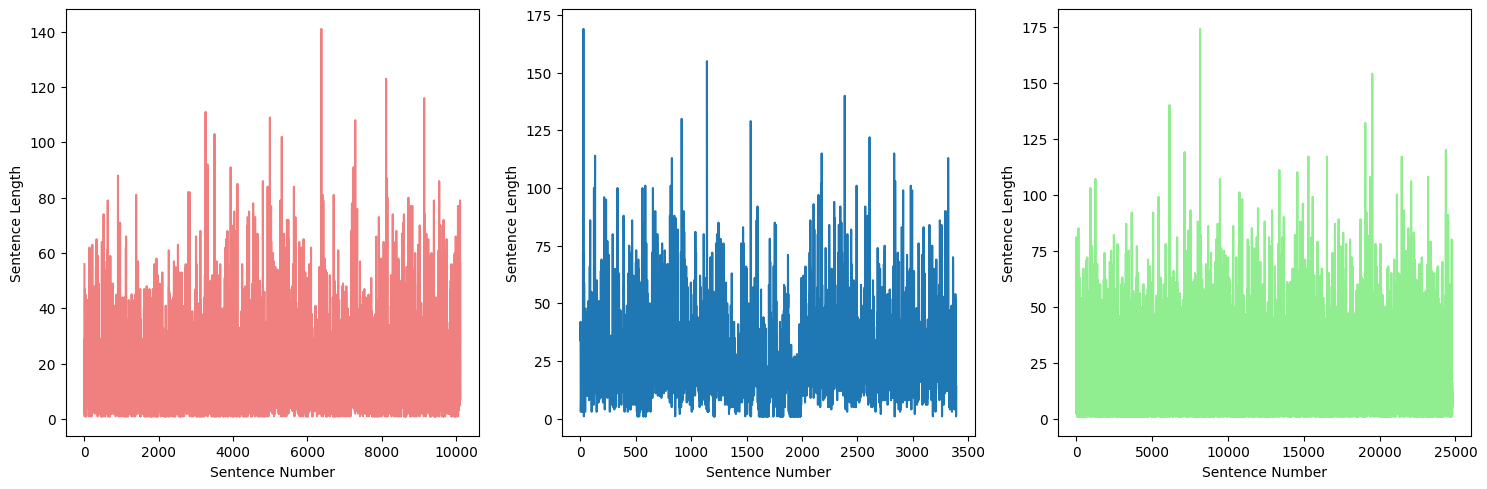

In [27]:
start = 2
end = start + 1
for i in range(start, end):
    path1 = f'/kaggle/working/Sentence/Histogram_{i}.png'
    path2 = f'/kaggle/working/Sentence/line_graph_{i}.png'
    sent1 = lenarr1[i]
    sent2 = lenarr2[i]
    sent3 = lenarr3[i]
    plot_hist(sent1, sent2, sent3, save_path = path1)
    plot_lines(sent1, sent2, sent3, save_path = path2)

In [33]:
def bwp_outliers(numbers1, numbers2, numbers3, save_path = None):
    '''
    Compares three Subplots
    '''
    fig, ax = plt.subplots(figsize=(8, 4))  
    
    wid = 0.4
    boxplot1 = ax.boxplot(numbers1, vert=False, positions=[1], patch_artist=True, 
                    boxprops=dict(facecolor="lightcoral"), widths=wid, medianprops=dict(color="black"), showfliers=False)
    
    boxplot2 = ax.boxplot(numbers2, vert=False, positions=[2], patch_artist=True, 
                          boxprops=dict(facecolor=None), widths=wid, medianprops=dict(color="black"), showfliers=False)
    
    boxplot3 = ax.boxplot(numbers3, vert=False, positions=[3], patch_artist=True, 
                    boxprops=dict(facecolor="lightgreen"), widths=wid, medianprops=dict(color="black"), showfliers=False)

    ax.set_title("Comparison of Box-and-Whisker Plot")
    ax.set_xlabel("Sentence length")
    ax.set_yticks([1, 2, 3])
    ax.set_yticklabels(["J A", "D D", "C D"])
    ax.set_xlim([-5, 60])
    
    # Add legends
    ax.legend([boxplot1["boxes"][0], boxplot2["boxes"][0], boxplot3["boxes"][0]], 
              ["Jane Austin", "Daniel Defore", "Charles Dickens"])

    plt.tight_layout()  # Adjust the layout to prevent overlapping
    if save_path:
        plt.savefig(save_path)
    plt.show()

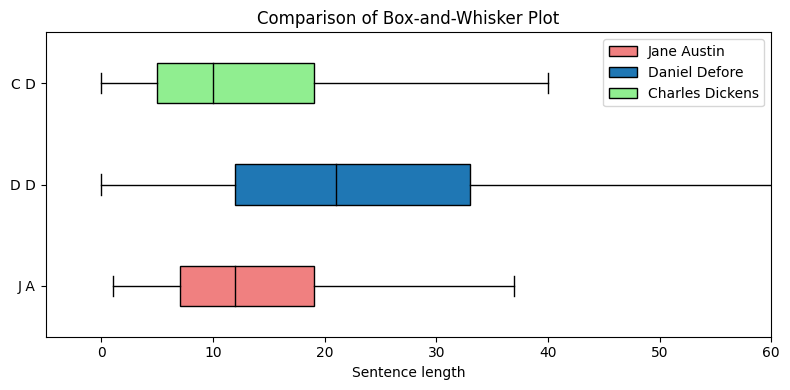

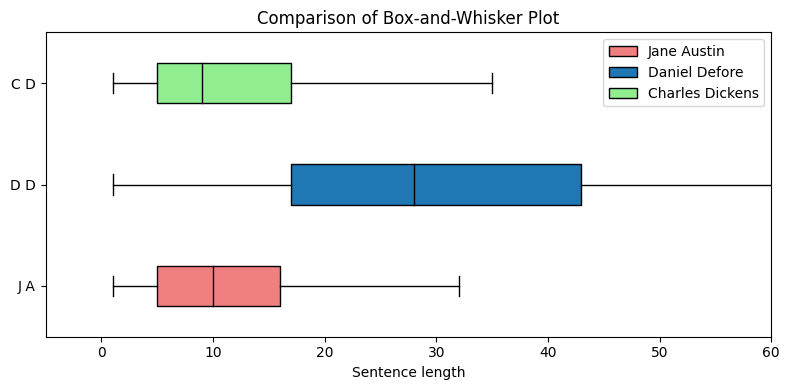

In [34]:
start = 0
end = start + 6
for i in range(start, end, 3):
    save_path = f'/kaggle/working/Sentence/Box_plot{i}.png'
    sent1 = lenarr1[i]
    sent2 = lenarr2[i]
    sent3 = lenarr3[i]
    bwp_outliers(sent1, sent2, sent3, save_path=None)

In [35]:
sentences1[0][:10]

['It is a truth universally acknowledged that a single man in possession of a good fortune must be in want of a wife',
 'However little known the feelings or views of such a man may be on his first entering a neighbourhood this truth is so well fixed in the minds of the surrounding families that he is considered as the rightful property of some one or other of their daughters',
 '“My dear Mr',
 'Bennet” said his lady to him one day “have you heard that Netherfield Park is let at last',
 '” Mr',
 'Bennet replied that he had not',
 '“But it is” returned she',
 '“for Mrs',
 'Long has just been here and she told me all about it',
 '” Mr']

In [36]:
def quartile(numbers):
    '''
    
    '''
    qarray = []
    # Calculate the Quartiles 
    for i in range(len(numbers)):
        quartiles = statistics.quantiles(numbers[i], n=4)
        qarray.append(quartiles)
    return qarray

In [42]:
qarr1 = quartile(lenarr1)
qarr2 = quartile(lenarr2)
qarr3 = quartile(lenarr3)

In [43]:
qarr1

[[7.0, 12.0, 19.0],
 [7.0, 14.0, 22.0],
 [7.0, 12.0, 21.0],
 [5.0, 10.0, 16.0],
 [7.0, 12.0, 20.0],
 [7.0, 12.0, 20.0],
 [7.0, 13.0, 22.0]]

In [41]:
def plot_3d_relation(*arrays, save_path = None):
    
    fig, axs = plt.subplots(1, len(arrays), figsize=(20, 6), subplot_kw={'projection': '3d'})
    
    tnames = ['Feluda Series Satyajit Ray', 'Novels of Rabindranath Tagore', 'Himu Series Humayun Ahmed']
    
    for i in range(len(arrays)):
        # Convert the input list of lists to a NumPy array
        data_array = np.array(arrays[i])
        # Extract x, y, and z coordinates from the array
        x = data_array[:, 0]
        y = data_array[:, 1]
        z = data_array[:, 2]

        # Create a 3D scatter plot with different markers for x, y, and z coordinates
        ax = axs[i]
        ax.scatter(x, y, z, c='b', marker='o', label='Q1', s=100)  # X Coordinate with circle marker
        ax.scatter(y, z, x, c='g', marker='^', label='Q2', s=100)  # Y Coordinate with triangle marker
        ax.scatter(z, x, y, c='r', marker='s', label='Q3', s=100)  # Z Coordinate with square marker

        # Set labels for x, y, and z axes
        ax.set_xlabel('Q1 Coordinate')
        ax.set_ylabel('Q2 Coordinate')
        ax.set_zlabel('Q3 Coordinate')

        # Set plot title and legend
        ax.set_title(f'{tnames[i]}')
        ax.legend()

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

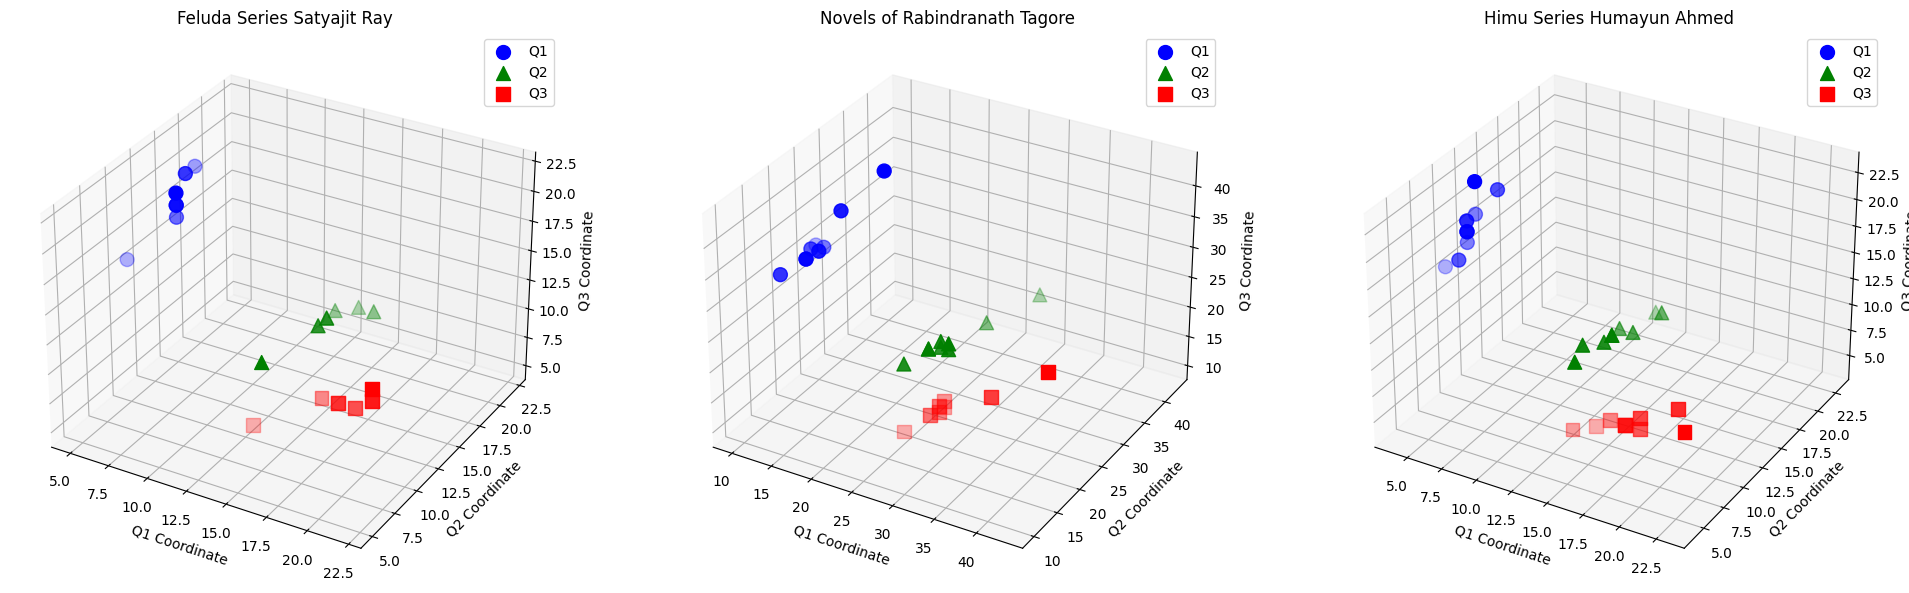

In [44]:
plot_3d_relation(qarr1, qarr2, qarr3, save_path=None)

In [45]:
# paths = []
# for dirname, _, filenames in os.walk('/kaggle/input/english-book/Salman_Rushdie_Copy'):
#     for filename in filenames:
#         paths.append(os.path.join(dirname, filename))
# paths

In [46]:
test = lenarr1[0]
len(test), max(test)

(8689, 90)

In [48]:
st, end = 60, 1000
count = sum(1 for val in test if st <= val <=end)
count

30

In [49]:
def catsentwo(x):
    '''
    Changes A length to an assumed category.
    '''
    if x <= 5:
        x = 0
    elif x <= 10:
        x = 1
    elif x <= 15:
        x = 2
    elif x <= 20:
        x = 3
    elif x <= 25:
        x = 4
    else:
        x = 5
    return x


def catsen(x, states = 10, dif = 2):
    '''
    Changes A length to an assumed category.
    
    Args:
    x : is a length of something (ie. Word Sentence)
    states : Number of considered states default is 10
    dif : Difference Between States
    '''
    return min(states-1, (x - 1) // dif)

In [50]:
tem = lenarr[0][:10]
print(tem)
[catsen(x, 3, 10) for x in tem]

[23, 48, 3, 18, 2, 6, 5, 2, 12, 2]


[2, 2, 0, 1, 0, 0, 0, 0, 1, 0]

In [51]:
def showA(arr, n=10, dif=2):
    '''
    Converts an array ready to be solved using Linear Algebra
    
    Args:
    arr : The array that we are converting to the state matrix.
    states : Number of considered states default is 10
    dif : Difference Between States
    '''
    # Initialize a nxn array with zeros
    # n = 4
    A = np.ones((n, n))
    # Raff 
    rff = arr
    for i in range(len(rff)-1):
        first_ind = catsen(rff[i], states=n, dif=dif)
        second_ind = catsen(rff[i+1], states=n, dif=dif)
        A[first_ind, second_ind] += 1
        
    # Convert it into probablity the required math analysis is in my notebook
    row_sums = A.sum(axis=1, keepdims=True)
    normalized_A = A / row_sums
    rnd_A = np.round(normalized_A, decimals=8)
#     print(f'Matrix A = \n{rnd_A}')
    return rnd_A

def stationary_state(matrix):
    # Calculate the stationary state vector using eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(matrix.T)
    stationary_state_index = np.argmin(np.abs(eigenvalues - 1.0))
    stationary_state_vector = np.real(eigenvectors[:, stationary_state_index])
    stationary_state_vector /= stationary_state_vector.sum()
    return stationary_state_vector

In [52]:
t = showA(lenarr[0],5, 5)
t, stationary_state(t)

(array([[0.2308627 , 0.30194411, 0.17193196, 0.12575942, 0.16950182],
        [0.20827943, 0.27468737, 0.20137991, 0.13195343, 0.18369987],
        [0.16567696, 0.28206651, 0.21021378, 0.13539192, 0.20665083],
        [0.17062818, 0.24957555, 0.19269949, 0.13752122, 0.24957555],
        [0.16065748, 0.22057264, 0.18716861, 0.14581124, 0.28579003]]),
 array([0.18891312, 0.26615402, 0.19327442, 0.13520027, 0.21645816]))

In [53]:
print(stationary_state(showA(lenarr[1])))

[0.11335659 0.05449994 0.0775474  0.07567081 0.08208848 0.0693046
 0.07188138 0.0744114  0.06736943 0.31386997]


In [58]:
# These are all stationary matrix array

st_matArr1 = []
for i in range(len(lenarr1)):
    st_matArr1.append(stationary_state(showA(lenarr1[i], 5, 5)))
st_matArr2 = []
for i in range(len(lenarr2)):
    st_matArr2.append(stationary_state(showA(lenarr2[i], 5, 5)))
st_matArr3 = []
for i in range(len(lenarr3)):
    st_matArr3.append(stationary_state(showA(lenarr3[i], 5, 5)))
    
print(f'Books Of W1 = {len(st_matArr1)},  Books Of W2 = {len(st_matArr2)}, Books Of W3 = {len(st_matArr3)}')

Books Of W1 = 7,  Books Of W2 = 9, Books Of W3 = 10


In [59]:
st_matArr1[0]

array([0.18891312, 0.26615402, 0.19327442, 0.13520027, 0.21645816])

In [60]:
def calculate_avg(array):
    # Calculate the means for each elementarray
    num = len(array)
    num_elements = len(array[0])  

    # Calculate the sum for each element position
    sums = [sum(inner_array[i] for inner_array in array) for i in range(num_elements)]
    # Calculate the means by dividing the sums by the number of arrays
    means = [sums[i] / num for i in range(num_elements)]
    means = np.round(means, decimals=3)
    return means

In [61]:
print(f'Writter 1 --> {calculate_avg(st_matArr1)}')
print(f'Writter 2 --> {calculate_avg(st_matArr2)}')
print(f'Writter 3 --> {calculate_avg(st_matArr3)}')

Writter 1 --> [0.192 0.254 0.185 0.126 0.242]
Writter 2 --> [0.082 0.114 0.136 0.139 0.528]
Writter 3 --> [0.285 0.23  0.152 0.107 0.226]


In [65]:
# N States 
def state_matrix_two(mat1, mat2, mat3, cmi = 1, save_path = None, n=10):
    '''
    Plots Difference of The Heatmap of The State Matrix of Two different Writters. 
    '''
    # cmaps that i want to use
    cmaps = ['viridis', 'inferno', 'plasma', 'cividis']
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1]})
    plt.subplots_adjust(wspace = .8) 
    
    im1 = axes[0].matshow(mat1, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[0].set_title('Jane Austin')

    im2 = axes[1].matshow(mat2, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[1].set_title('Daniel Defore')
    
    im3 = axes[2].matshow(mat3, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[2].set_title('Charles Dickens')
    
    rownum = n
    # Add text annotations
    for i in range(rownum):
        for j in range(rownum):
            axes[0].text(j, i, f'{matrix1[i, j]:.2f}', ha="center", va="center", color="w")
            axes[1].text(j, i, f'{matrix2[i, j]:.2f}', ha="center", va="center", color="w")
            axes[2].text(j, i, f'{matrix3[i, j]:.2f}', ha='center', va='center', color='w')

    
    # Set x-ticks and y-ticks labels from 'A' to 'J'
    tick_labels = list(string.ascii_uppercase)[:rownum]
    for ax in axes:
        ax.set_xticks(np.arange(rownum))
        ax.set_yticks(np.arange(rownum))
        ax.set_xticklabels(tick_labels)
        ax.set_yticklabels(tick_labels)
        ax.tick_params(axis='both', which='both', length=0)

    plt.tight_layout()
    plt.colorbar(im1, ax=axes)
    if save_path:
        plt.savefig(save_path)
    plt.show()

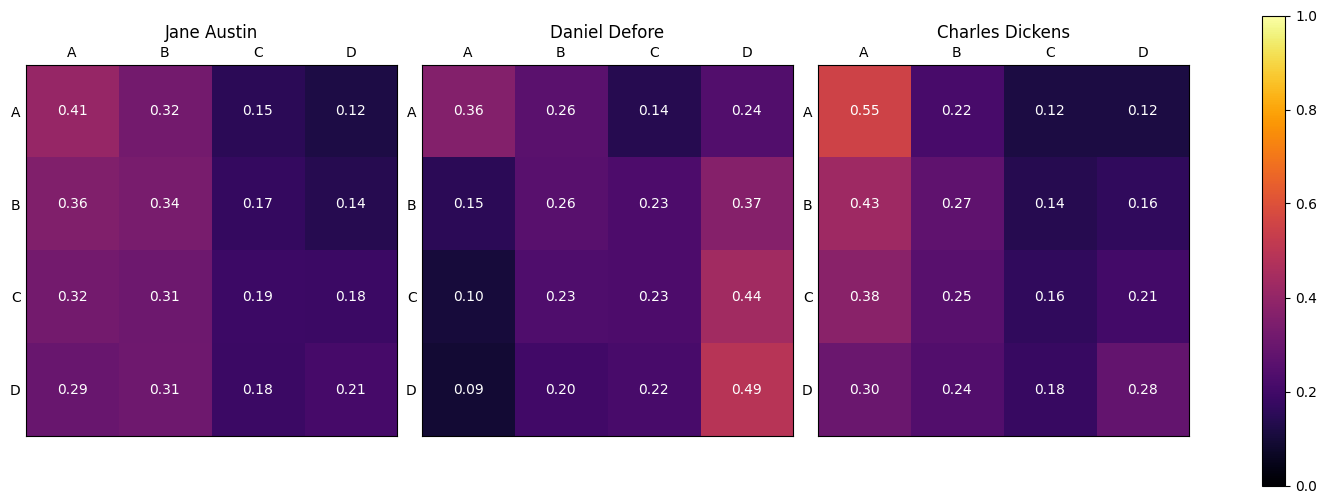

In [68]:
matrix1 = showA(lenarr1[0],4,8)
matrix2 = showA(lenarr2[0],4,8)
matrix3 = showA(lenarr3[0],4,8)
state_matrix_two(matrix1, matrix2, matrix3, cmi=1, n=4)

In [69]:
def book_list(path):
    '''
    Returns the book list of in a directory
    '''
    # Create all the book names list
    np.random.seed(42)
    paths = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            paths.append(os.path.join(filename.replace('.txt', '')))
    return paths

In [71]:
# sr_book_list = book_list('/kaggle/input/english-book/Salman_Rushdie_Copy')
ja_book_list = book_list('/kaggle/input/english-book/Jane Austen')
dd_book_list = book_list('/kaggle/input/english-book/Defore Novels')
cd_book_list = book_list('/kaggle/input/english-book/Charles Dickens')

In [72]:
ja_book_list

['jane-austen_pride-and-prejudice_advanced',
 'Lady Susan',
 'jane-austen_mansfield-park_advanced',
 'jane-austen_emma_advanced',
 'jane-austen_northanger-abbey_advanced',
 'jane-austen_persuasion_advanced',
 'jane-austen_sense-and-sensibility_advanced']

1 jane-austen_pride-and-prejudice_advanced	jane-austen_pride-and-prejudice_advanced	jane-austen_pride-and-prejudice_advanced


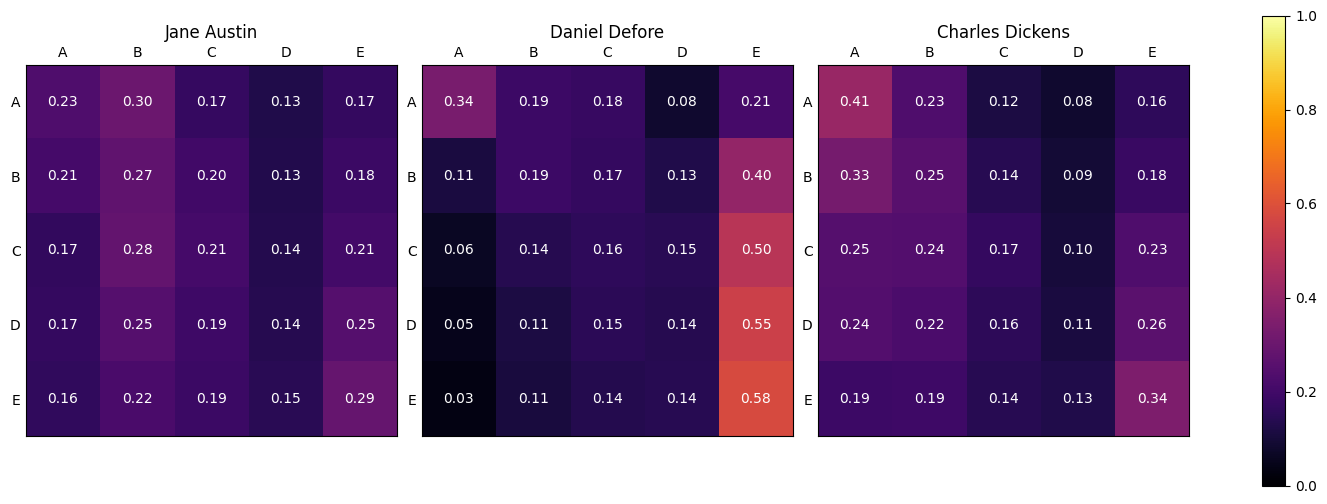

2 Lady Susan	Lady Susan	Lady Susan


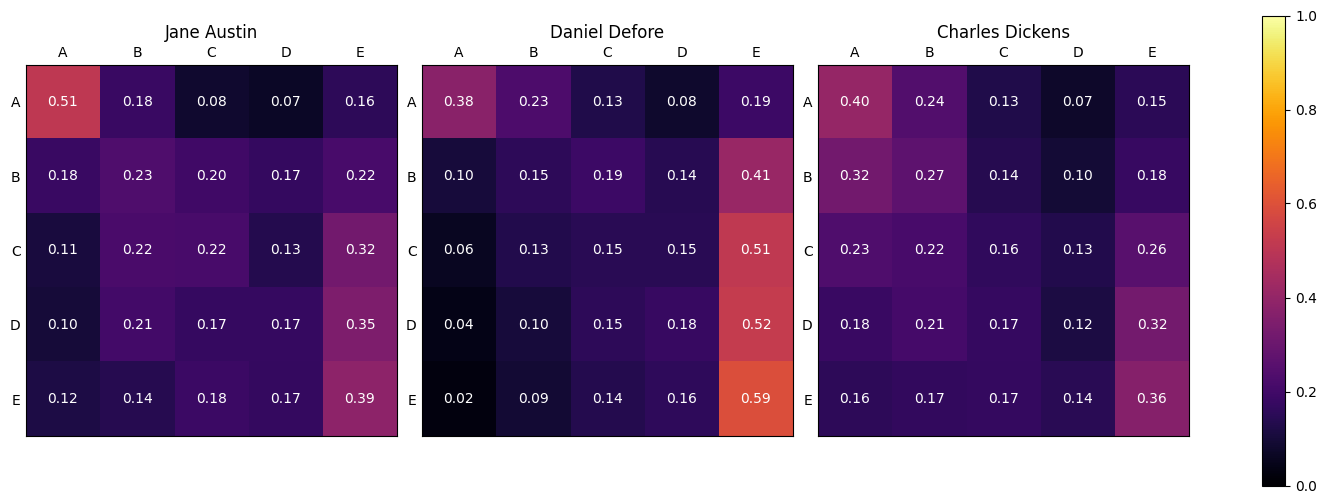

<---------------ENDED----------->


In [75]:
# N is the number of comparision you want to see
N = 2

# number of states
states = 5
d = 5
for i in range(N):
    print(f'{i+1} {ja_book_list[i]}\t{ja_book_list[i]}\t{ja_book_list[i]}')
    if i == 200:
        pass
    else:
        path = f'/kaggle/working/Sentence/output_matrix_{i}.png'
        matrix1 = showA(lenarr1[i], states, d)
        matrix2 = showA(lenarr2[i], states, d)
        matrix3 = showA(lenarr3[i], states, d)
        state_matrix_two(matrix1, matrix2, matrix3, cmi=1, n=states)
    
print('<---------------ENDED----------->')

In [76]:
from sklearn.metrics.pairwise import cosine_similarity

def get_cosine_similarity(array):
    '''
    Returns the cosine Similarity Between the First book and All the other books
    '''
    cosine_similarity_score = []
    for i in range(1, len(array)):
        mat1 = showA(array[0],  states, d)
        mat2 = showA(array[i],  states, d)
        # Reshape matrices into 1-D arrays before calculating cosine similarity
        cosine_similarity_score.append(cosine_similarity(mat1.reshape(1, -1), mat2.reshape(1, -1))[0, 0])
    return cosine_similarity_score


In [78]:
sim_arr1 = get_cosine_similarity(lenarr)
sim_arr2 = get_cosine_similarity(lenarr2)
sim_arr3 = get_cosine_similarity(lenarr3)

In [84]:
def scatter_plot_with_lines(*arrays, save_path = None):
    '''
    Create subplots with scatter points and lines connecting them for multiple arrays.
    '''
    max_length = max(len(arr) for arr in arrays)
    tnames = ['Jane Austin', 'Novels of Daniel Defore', 'Charles Dickens']
    marks = ['o', 'x', '*']
    colors = ['coral', 'blue', 'red']

    fig, axs = plt.subplots(1, len(arrays), figsize=(18, 6), sharey=True)

    for i, (array, ax, color) in enumerate(zip(arrays, axs, colors)):
        x_values = list(range(1, len(array) + 1))
        ax.scatter(x_values, array, label=f'{tnames[i]}', marker=marks[i], color=color)
        ax.plot(x_values, array, linestyle='-', color=color)
        ax.set_xlabel('Book Number')
        ax.set_title(f'{tnames[i]}')
        ax.set_ylim([0.5, 1])

    axs[0].set_ylabel('Cosine Similarity')
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)  
    plt.show()


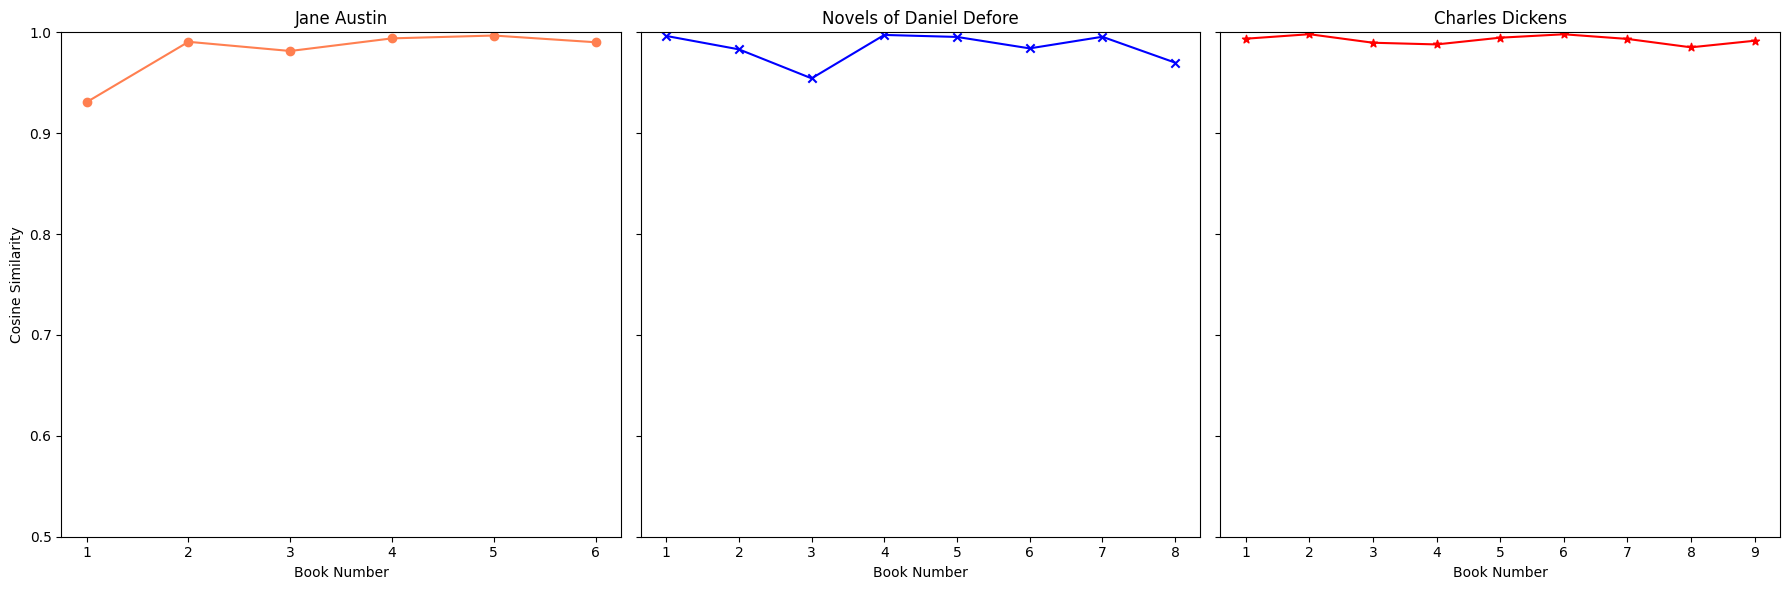

In [82]:
# Example usage:
scatter_plot_with_lines(sim_arr1, sim_arr2, sim_arr3, save_path = '/kaggle/working/Sentence/sentence_matrix_corelation.png')

In [85]:
dd_book_list

['1722 MOLL FLANDERS',
 '1719 FURTHER  ROBINSON CRUSOE',
 '1722 JOURNAL PLAGUE YEAR',
 '1705 THE CONSOLIDATOR',
 '1719 ROBINSON CRUSOE',
 '1720 CAPTAIN SINGLETON',
 '1722 THE LIFE OF COLONEL JACQUE',
 '1724 A HISTORY OF THE LIFE OF ROXANA',
 '1720 MEMOIRS OF A CAVALIER']

In [83]:
ja_book_list

['jane-austen_pride-and-prejudice_advanced',
 'Lady Susan',
 'jane-austen_mansfield-park_advanced',
 'jane-austen_emma_advanced',
 'jane-austen_northanger-abbey_advanced',
 'jane-austen_persuasion_advanced',
 'jane-austen_sense-and-sensibility_advanced']

In [86]:
# Define number of steps as n
n = 6
# Define k for iterations
k = 7

def track_the_change(array):
    '''
    Will add later
    '''
    mata = array
    shape = (1, n)
    pi = np.random.rand(*shape)  
    pi /= pi.sum()  
    pi = pi.ravel()
    pis = []
    pis.append(pi)
    i = 0
    while(True):
        res = np.dot(pi, mata)
        res = np.round(res, decimals=4)
        # Put track of the pi matrix
        pis.append(res)
        if i == k-2:
            break
        pi = res
        i += 1
       
    # Make the probablity array
    probs = []
    for i in range(n):
        x = []
        for array in pis:
            x.append(array[i])
        probs.append(x)
    return probs

In [92]:
def plot_the_change_2(prob1, prob2, prob3, save_path = None):
    x_values = np.array(list(range(1,k+1)))
    labels = ['A', 'B', 'C', 'D', 'E', 'F']
#     labels = ['A', 'B', 'C', 'D']
    fig, axs = plt.subplots(1, 3, figsize=(18, 9))  
    ylm = 0.45
    
    # Plot first set of prob
    for i in range(len(prob1)):
        axs[0].plot(x_values, prob1[i], marker='o', linestyle='-', label=labels[i], markersize=8)
    axs[0].set_title('Jane Austin' )
    axs[0].set_xlabel('No Of Iteration')
    axs[0].set_ylabel('Probabilities')
#     axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6)
    axs[0].set_ylim([0, ylm])

    # Plot second set of prob
    for i in range(len(prob2)):
        axs[1].plot(x_values, prob2[i], marker='D', linestyle='-', label=labels[i], markersize=6)
    axs[1].set_title('Daniel Defore')
    axs[1].set_xlabel('No Of Iteration')
    axs[1].set_ylabel('Probabilities')
#     axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6)
    axs[1].set_ylim([0, ylm])
    
    # Plot second set of prob
    for i in range(len(prob3)):
        axs[2].plot(x_values, prob3[i], marker='*', linestyle='-', label=labels[i], markersize=10)
    axs[2].set_title('Charles Dickens')
    axs[2].set_xlabel('No Of Iteration')
    axs[2].set_ylabel('Probabilities')
#     axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6)
    axs[2].set_ylim([0, ylm])
    
    # Create a single legend in the middle subplot
    axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=n, prop={'size': 12})


    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

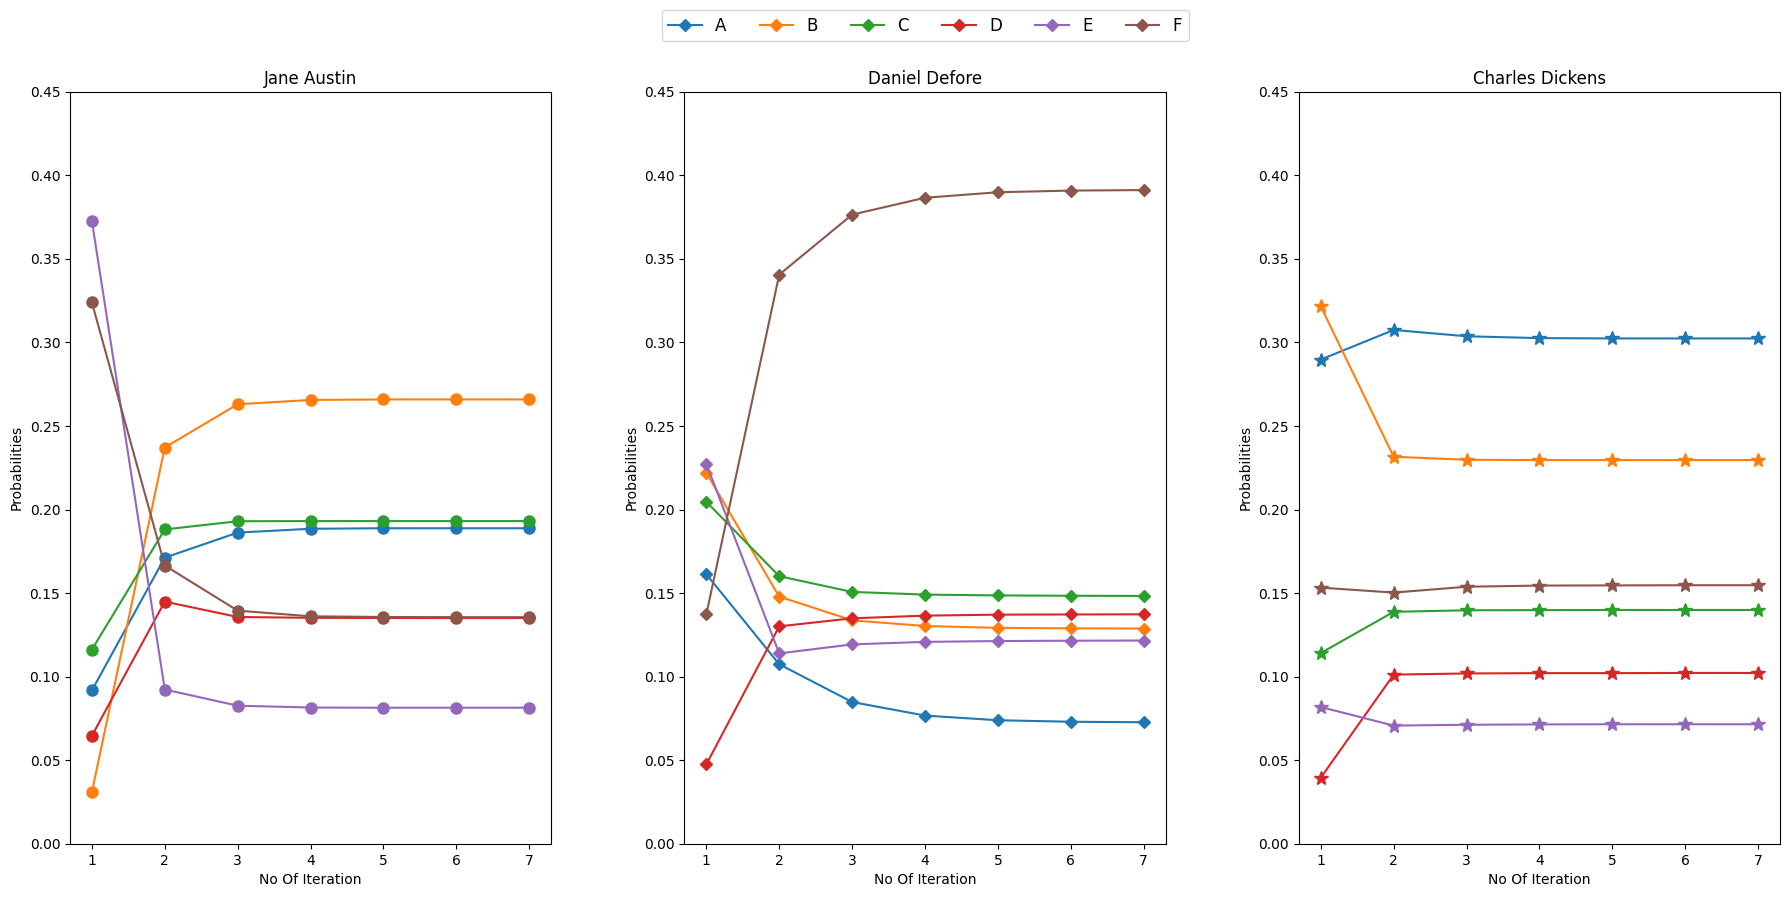

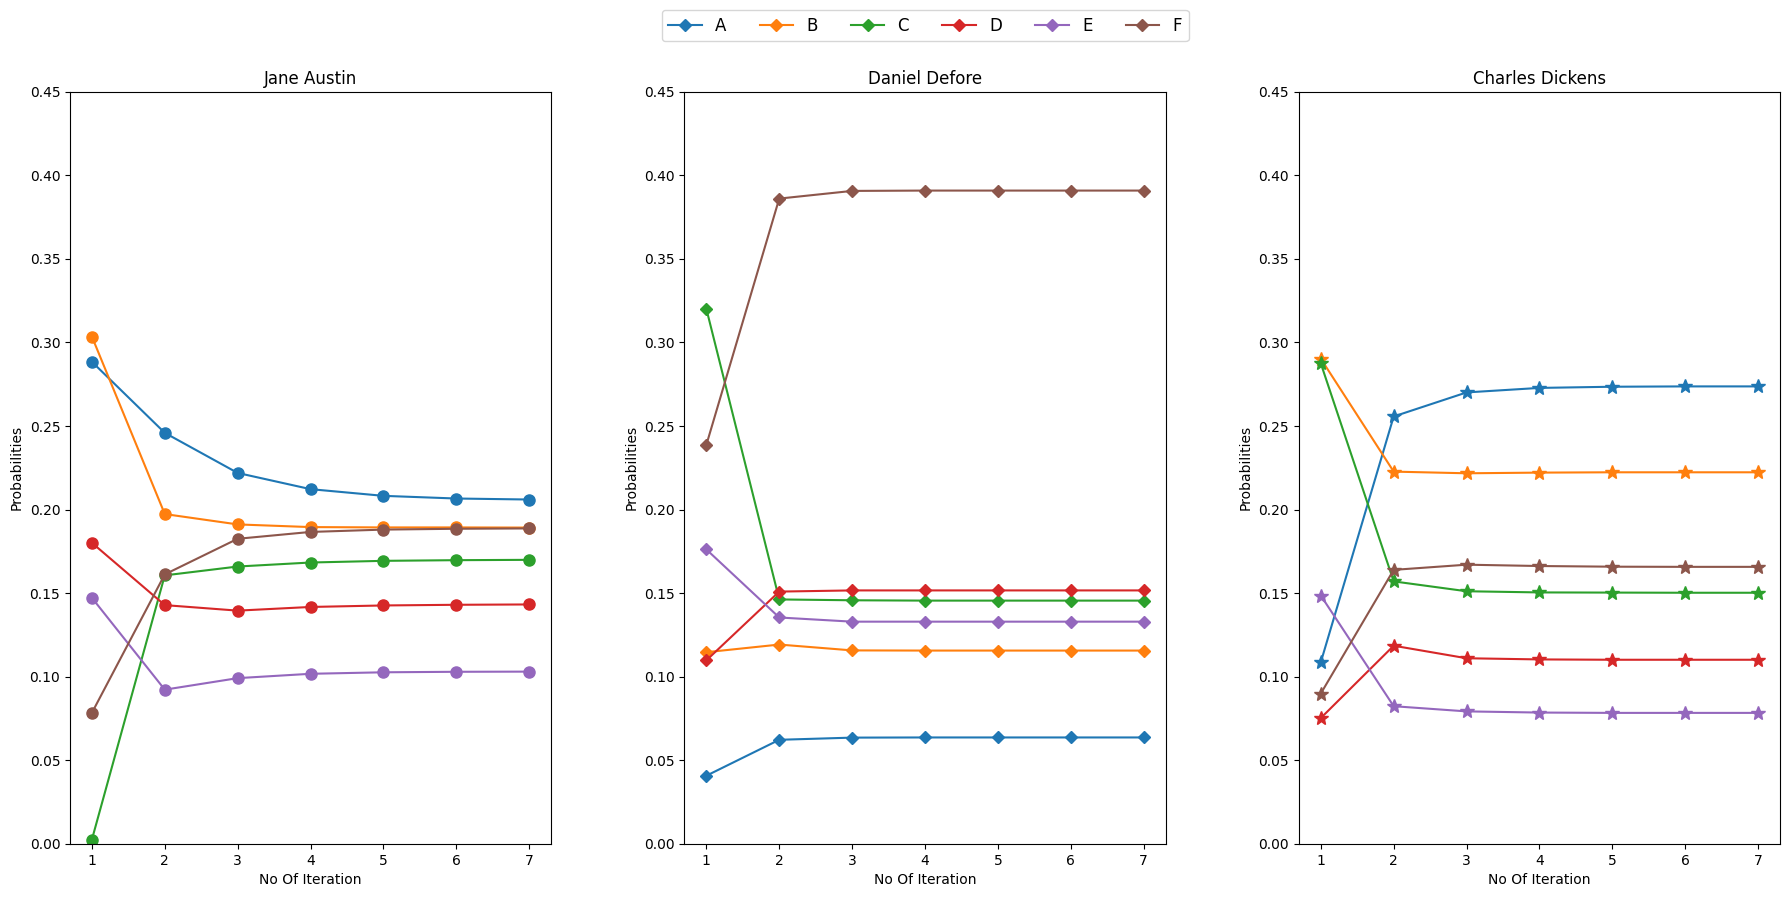

In [93]:
nit = 2
for i in range(nit):
    path = f'/kaggle/working/Sentence/markov_plot_{i}.png'
    array = showA(lenarr1[i], 6, 5)
    array2 = showA(lenarr2[i], 6, 5)
    array3 = showA(lenarr3[i], 6, 5)
    plot_the_change_2(track_the_change(array), track_the_change(array2),track_the_change(array3), save_path=path)

In [94]:
def get_cosine_similarity2(array):
    '''
    Returns the cosine Similarity Between the First book and All the other books 
    Stationary State Corelation
    '''
    cosine_similarity_score = []
    for i in range(1, len(array)):
        mat1 = array[0]
        mat2 = array[i]
        # Reshape matrices into 1-D arrays before calculating cosine similarity
        cosine_similarity_score.append(cosine_similarity(mat1.reshape(1, -1), mat2.reshape(1, -1))[0][0])
    return cosine_similarity_score

In [95]:
print(len(st_matArr1), len(st_matArr2), len(st_matArr3))

7 9 10


In [96]:
sim_ar1 = get_cosine_similarity2(st_matArr1)
sim_ar2 = get_cosine_similarity2(st_matArr2)
sim_ar3 = get_cosine_similarity2(st_matArr3)

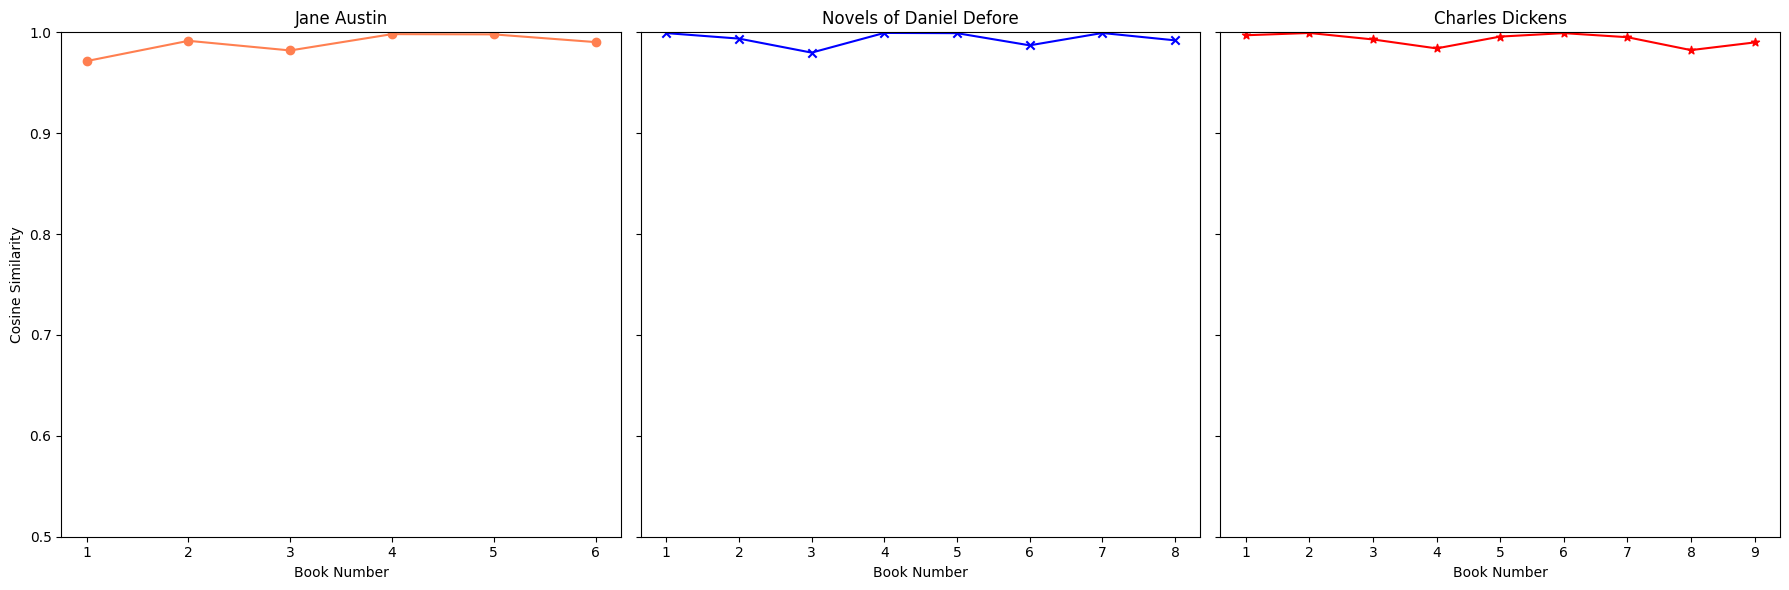

In [97]:
# Example usage:
scatter_plot_with_lines(sim_ar1, sim_ar2, sim_ar3, save_path = '/kaggle/working/Sentence/sentence_stState_corealtion.png')

In [ ]:
# Set the Value of states and difference
states_n_dif = [[5,5],[2,10], [3,10],[3,8], [3,6], [4,4], [5,2], [6,3], [7,3], [7,2], [8,3], [10,2]]
states_n_dif = states_n_dif[:1]

In [ ]:
num_of_cc = 0
for x in states_n_dif:
    num_of_cc += (x[0]+1)*x[0]
num_of_cc+7

In [ ]:
def add_features2(array, data):
    '''
    Bismillah
    '''
    for value in states_n_dif:
        states = value[0]
        d = value[1]
        
        # This is the stationary state
        st_state = []
        for i in range(len(array)):
            st_state.append(stationary_state(showA(array[i], states, d)))
        
        # This is the state matrix
        state_mat1 = []
        for i in range(len(array)):
            state_mat1.append(showA(array[i], states, d))

        # Add stationary states in the dataframe
        for s in range(states):
            data[f'st_state{states}_dif{d}_{s+1}'] = np.array(st_state)[:, s]
        for s in range(states):
            for k in range(states):
                data[f'state{states}_dif{d}_{states*s+k+1}'] = np.array(state_mat1)[:, s, k]
        
            

    
def add_means(array, data):
    means = []
    medians = []
    modes = []
    variances = []
    std_devs = []
    
    for i in range(len(array)):
        # means
        means.append(statistics.mean(array[i]))
        # median
        medians.append(statistics.median(array[i]))
        # mode
        mode_data = Counter(array[i])
        modes.append(mode_data.most_common(1)[0][0])
        # variance
        variances.append(statistics.variance(array[i]))
        # std deviation
        std_devs.append(statistics.stdev(array[i]))
    data['mean'] = means
    data['median'] = medians
    data['mode'] = modes
    data['variance'] = variances
    data['std_dev'] = std_devs

In [ ]:
# Satyajit Ray
srdata = (
{
    'book_id' : sr_book_list,
    'writer': 'Satyajit Ray',
})
add_features2(lenarr, srdata)
add_means(lenarr, srdata)

In [ ]:
srdata = pd.DataFrame(srdata)
print(srdata.shape)
srdata.head(2)

<div style="text-align: center; background-color: lightgreen;padding: 45px; border-radius: 5px; margin-bottom: 10px;">
    <h2> Now Discover the Punctuation Pattern </h2>
    <h4> At First Necessary Functions </h4>
</div>

In [98]:
# List of Punctuation we are considering
# plist = ['।', ',', '?', '!']
plist = ['.', ',', '?', '!']


def make_punctuations(content):
    '''
    Takes a full story of a book or Multiple Books
    And convert it into a list of punctuations.
    '''
    flist = []
    for text in content:
        if text in plist:
            flist.append(text)
    return flist

def read_stories_forPunc(paths):
    '''
    Read All the stories from a folder and return an array of Punctuations.
    '''
    puncs = []
    for path in paths:
        # File path with Bengali characters
        file_path_bangla = path
        # Open the file using triple quotes around the file path
        with open(f"""{file_path_bangla}""", 'r', encoding='utf-8') as file:
            content = file.read()
        sent = make_punctuations(content)
        puncs.append(sent)
    # Convert the 2d array into 1d array
#     ments = [element for row in sents for element in row]
    return puncs

def catpun(x):
    '''
    Changes A punctuations to an assumed category.
    '''
    if x == '.':
        x = 0
    elif x == '?':
        x = 1
    elif x == '!':
        x = 2
    else:
        x = 3
    return x

In [99]:
puncat = {
    "Punc_category": ["।", "?", "!", ","],
    "label": [0, 1, 2, 3],
    'State': ['A', 'B', 'C', 'D']
}
labeldf = pd.DataFrame(puncat)
labeldf

,Punc_category,label,State
0,।,0,A
1,?,1,B
2,!,2,C
3,",",3,D


In [100]:
def igenmatrix_Punc(arr):
    '''
    Converts an array ready to be solved using Linear Algebra
    '''
    # Initialize a nxn array with zeros
    n = 4
    A = np.zeros((n, n))
    # Raff 
    rff = arr
    for i in range(len(rff)-1):
        first_ind = catpun(rff[i])
        second_ind = catpun(rff[i+1])
        A[first_ind, second_ind] += 1
        
    # Convert it into probablity the required math analysis is in my notebook
    row_sums = A.sum(axis=1, keepdims=True)
    normalized_A = A / row_sums
    rnd_A = np.round(normalized_A, decimals=2)
#     print(f'Matrix A = \n{rnd_A}')
    
    # Transpose of the matrix
    AT = rnd_A.T
    
    # Identity matrix
    identity_matrix = np.eye(n)

    # Subtract identity matrix from the transposed matrix
    ATI = AT - identity_matrix
    
    return ATI

def PuncRank(matrix):
    '''
    Returns the stationary matrix for a given Sentence length Array.
    '''
    # Create a new matrix with the last column replaced
    new_column = np.array([1, 1, 1, 1])
    modified_matrix = matrix.copy()
    modified_matrix[-1] = new_column
    #print(modified_matrix)
    
    # Right-hand side vector of the given equations
    b = np.array([0, 0, 0, 1])
    # Solve the system of equation now
    solution = np.linalg.solve(modified_matrix, b)
    solution = np.round(solution, decimals=2)
    
    return solution


def Punc_showA(arr):
    '''
    Converts an array ready to be solved using Linear Algebra
    '''
    # Initialize a nxn array with zeros
    n = 4
    A = np.zeros((n, n))
    # Raff 
    rff = arr
    for i in range(len(rff)-1):
        first_ind = catpun(rff[i])
        second_ind = catpun(rff[i+1])
        A[first_ind, second_ind] += 1
        
    # Convert it into probablity the required math analysis is in my notebook
    row_sums = A.sum(axis=1, keepdims=True)
    normalized_A = A / row_sums
    rnd_A = np.round(normalized_A, decimals=2)
#     print(f'Matrix A = \n{rnd_A}')
    return rnd_A

In [102]:
def create_punc_array(path):
    '''
    Chill 2
    '''
    paths = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            paths.append(os.path.join(dirname, filename))

    puncarr = read_stories_forPunc(paths)
    return puncarr

pncarr1 = create_punc_array('/kaggle/input/english-book/Jane Austen')
pncarr2 = create_punc_array('/kaggle/input/english-book/Defore Novels')
pncarr3 = create_punc_array('/kaggle/input/english-book/Charles Dickens')
# pncarr4 = create_punc_array('/kaggle/input/bookscollection/Misir_Ali_all')

In [103]:
pncarr1[0][:10]

[',', ',', '.', ',', ',', '.', '.', ',', ',', '?']

In [104]:
len(pncarr1), len(pncarr2), len(pncarr3)

(7, 9, 10)

In [105]:
pn_matArr1 = []
for i in range(len(pncarr1)):
    pn_matArr1.append(PuncRank(igenmatrix_Punc(pncarr1[i])))
pn_matArr2 = []
for i in range(len(pncarr2)):
    pn_matArr2.append(PuncRank(igenmatrix_Punc(pncarr2[i])))
pn_matArr3 = []
for i in range(len(pncarr3)):
    pn_matArr3.append(PuncRank(igenmatrix_Punc(pncarr3[i])))

In [106]:
pn_matArr2

[array([0.2 , 0.01, 0.  , 0.79]),
 array([0.17, 0.01, 0.  , 0.82]),
 array([ 0.19,  0.01, -0.  ,  0.8 ]),
 array([ 0.15,  0.01, -0.  ,  0.83]),
 array([0.14, 0.01, 0.  , 0.84]),
 array([0.17, 0.01, 0.  , 0.82]),
 array([0.22, 0.02, 0.  , 0.76]),
 array([0.18, 0.01, 0.  , 0.8 ]),
 array([ 0.23,  0.  , -0.  ,  0.77])]

In [107]:
print(f'Writter 1 --> {calculate_avg(pn_matArr1)}')
print(f'Writter 2 --> {calculate_avg(pn_matArr2)}')
print(f'Writer 3 --> {calculate_avg(pn_matArr3)}')

Writter 1 --> [0.347 0.027 0.034 0.593]
Writter 2 --> [0.183 0.01  0.    0.803]
Writer 3 --> [0.315 0.038 0.047 0.602]


In [108]:
def puntonum(x):
    '''
    Changes A punctuations to an assumed category.
    '''
    if x == '.':
        x = 1
    elif x == '?':
        x = 2
    elif x == '!':
        x = 3
    elif x == ',':
        x = 4
    return x

def kinamdebo(array):
    tarray = []
    for ind in range(0, len(array)):
        tarray.append(puntonum(array[ind]))
    return tarray

def sequence_of_punctuations(*arrays, save_path=None):
    '''
    Create a subplot with two line plots
    '''
    
    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(20,8))
    clr = ['r', 'orange', 'blue', 'green']
    sizes = [10000, 40000, 20000, 4000]
    # Plot the Line plot using a loop
    for j, array in enumerate(arrays):
        for i, value in enumerate(tqdm(array)):
            axes[j].scatter(i, 1, color= clr[value-1], marker='|', s=sizes[value-1])
            axes[j].set_xlabel('SEQUENCE', fontsize=12)
            axes[0].set_ylabel('PUNCTUATION', fontsize=12)
            axes[j].set_yticks([0.5, 1, 1.5])
            axes[0].set_title('Punctuation Sequence Plot', fontsize=18)
            axes[2].set_title('Punctuation Sequence Plot', fontsize=18)
            # Plot the first line plot in the first subplot
            # axes[0].set_title('Sentence Length in SR')

    
    # Create custom legend handles and labels
    custom_handles = [plt.Rectangle((0, 0), 1, 1, color='red', linewidth=2), 
                      plt.Rectangle((0, 0), 1, 1, color='orange', linewidth=2),
                      plt.Rectangle((0, 0), 1, 1, color='blue', linewidth=2),
                      plt.Rectangle((0, 0), 1, 1, color='green', linewidth=2),
                  ]
    legend_labels = ['Period', 'Question', 'Exclamatory', 'Comma']

    # Add the legend to the figure
    fig.legend(custom_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.51, .96),
           ncol=4, prop={'size': 15})
    
    # Adjust spacing between subplots
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    # Display the plot
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [109]:
pr = kinamdebo(pncarr1[0])
pr[:10]

[4, 4, 1, 4, 4, 1, 1, 4, 4, 2]

In [110]:
# N is the number of comparision you want to see
N = 2
ll = 20
for i in range(N):
    path = f'/kaggle/working/Punctuation/punctuation_seq_plot_{i+1}.png'
    matrix1 = kinamdebo(pncarr1[i])
    matrix2 = kinamdebo(pncarr2[i])
    matrix3 = kinamdebo(pncarr3[i])
    print(len(matrix1), len(matrix2), len(matrix3))
#     sequence_of_punctuations(matrix1, matrix2, matrix3, save_path = path)
#     sequence_of_punctuations(matrix1[:ll], matrix2[:ll], matrix3[:ll], save_path=path)
    
print('<---------------ENDED----------->')

16620 16793 53896
2801 11898 21538
<---------------ENDED----------->


In [111]:
def state_matrix_punc(mat1, mat2, mat3, cmi = 1, save_path = None):
    '''
    Plots Difference of The Heatmap of The State Matrix of Two different Writters. 
    '''
    # cmaps that i want to use
    cmaps = ['viridis', 'inferno', 'plasma', 'cividis']
    fig, axes = plt.subplots(1, 3, figsize=(19, 6), gridspec_kw={'width_ratios': [1, 1, 1]})
    plt.subplots_adjust(wspace = .8) 
    
    im1 = axes[0].matshow(mat1, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[0].set_title('Satyajit Ray')

    im2 = axes[1].matshow(mat2, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[1].set_title('Rabindranath Tagore')
    
    im3 = axes[2].matshow(mat3, cmap=cmaps[cmi], vmin=0, vmax=1)
    axes[2].set_title('Humayun Ahmed')
    
    rownum = 4
#     # Add text annotations
    for i in range(rownum):
        for j in range(rownum):
            axes[0].text(j, i, f'{matrix1[i, j]:.2f}', ha="center", va="center", color="w")
            axes[1].text(j, i, f'{matrix2[i, j]:.2f}', ha="center", va="center", color="w")
            axes[2].text(j, i, f'{matrix3[i, j]:.2f}', ha='center', va='center', color='w')

    for ax in axes:
        ax.set_xticks(np.arange(rownum))
        ax.set_yticks(np.arange(rownum))
        ax.set_xticklabels(['[ | ]', '[ ? ]', '[ ! ]', '[ , ]'])
        ax.set_yticklabels(['[ | ]', '[ ? ]', '[ ! ]', '[ , ]'])
        ax.tick_params(axis='both', which='both', length=0)

    plt.tight_layout()
    plt.colorbar(im1, ax=axes)
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [112]:
! mkdir Punctuation

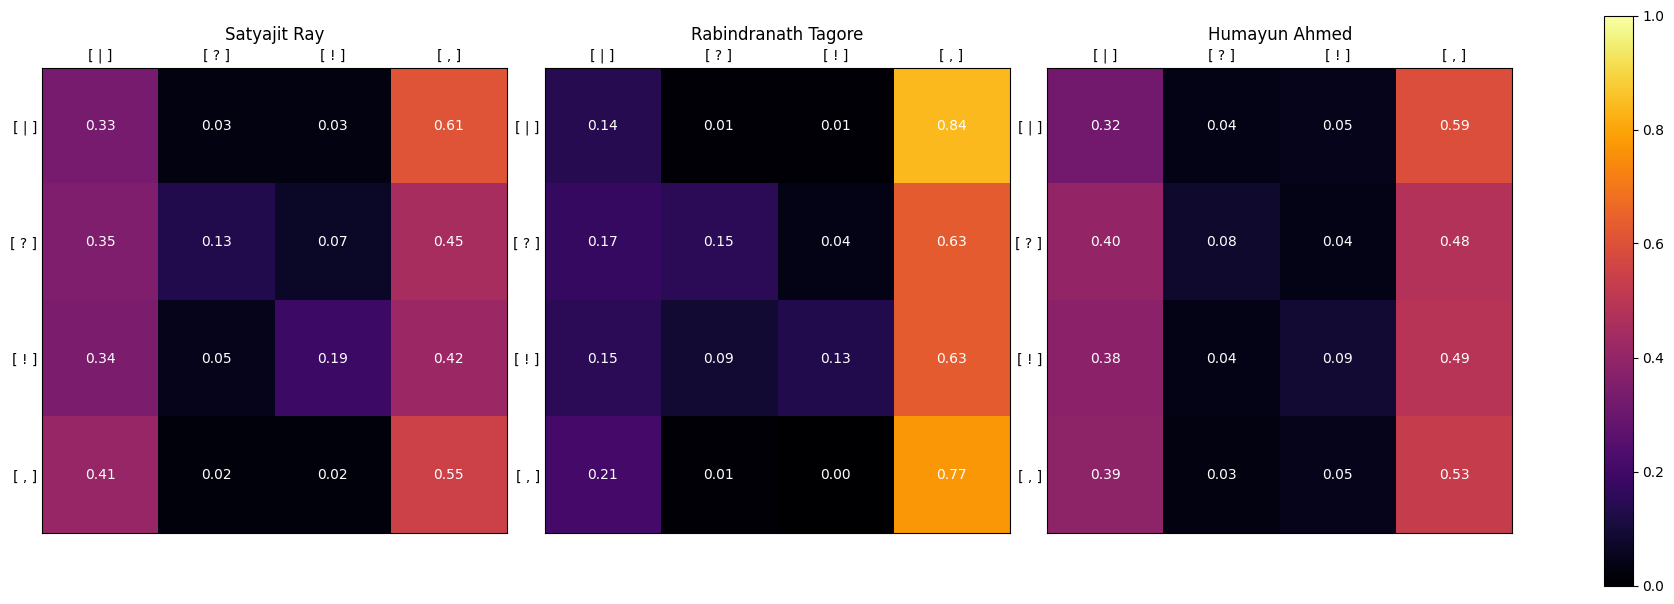

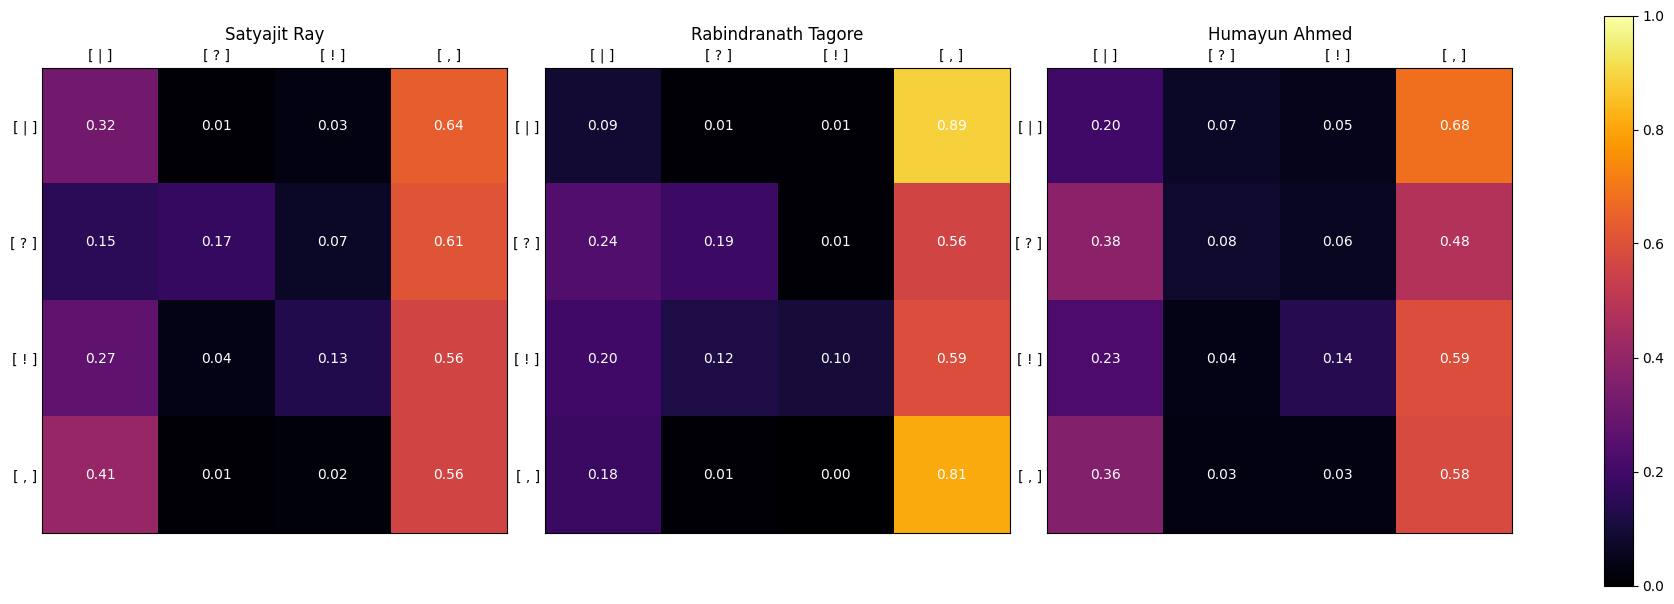

<---------------ENDED----------->


In [113]:
# N is the number of comparision you want to see
N = 2
for i in range(N):
    path = f'/kaggle/working/Punctuation/punc_matrix_plot_{i+1}.png'
    matrix1 = Punc_showA(pncarr1[i])
    matrix2 = Punc_showA(pncarr2[i])
    matrix3 = Punc_showA(pncarr3[i])
    state_matrix_punc(matrix1, matrix2, matrix3, cmi=1, save_path=None)
    
print('<---------------ENDED----------->')

In [114]:
def punc_cosine_similarity(array):
    '''
    Returns the cosine Similarity Between the First book and All the other books
    '''
    cosine_similarity_score = []
    for i in range(1, len(array)):
        mat1 = Punc_showA(array[0])
        mat2 = Punc_showA(array[i])
        # Reshape matrices into 1-D arrays before calculating cosine similarity
        cosine_similarity_score.append(cosine_similarity(mat1.reshape(1, -1), mat2.reshape(1, -1))[0, 0])
    return cosine_similarity_score

In [115]:
sim_arr1 = punc_cosine_similarity(pncarr1)
sim_arr2 = punc_cosine_similarity(pncarr2)
sim_arr3 = punc_cosine_similarity(pncarr3)
len(sim_arr1), len(sim_arr2), len(sim_arr3)

(6, 8, 9)

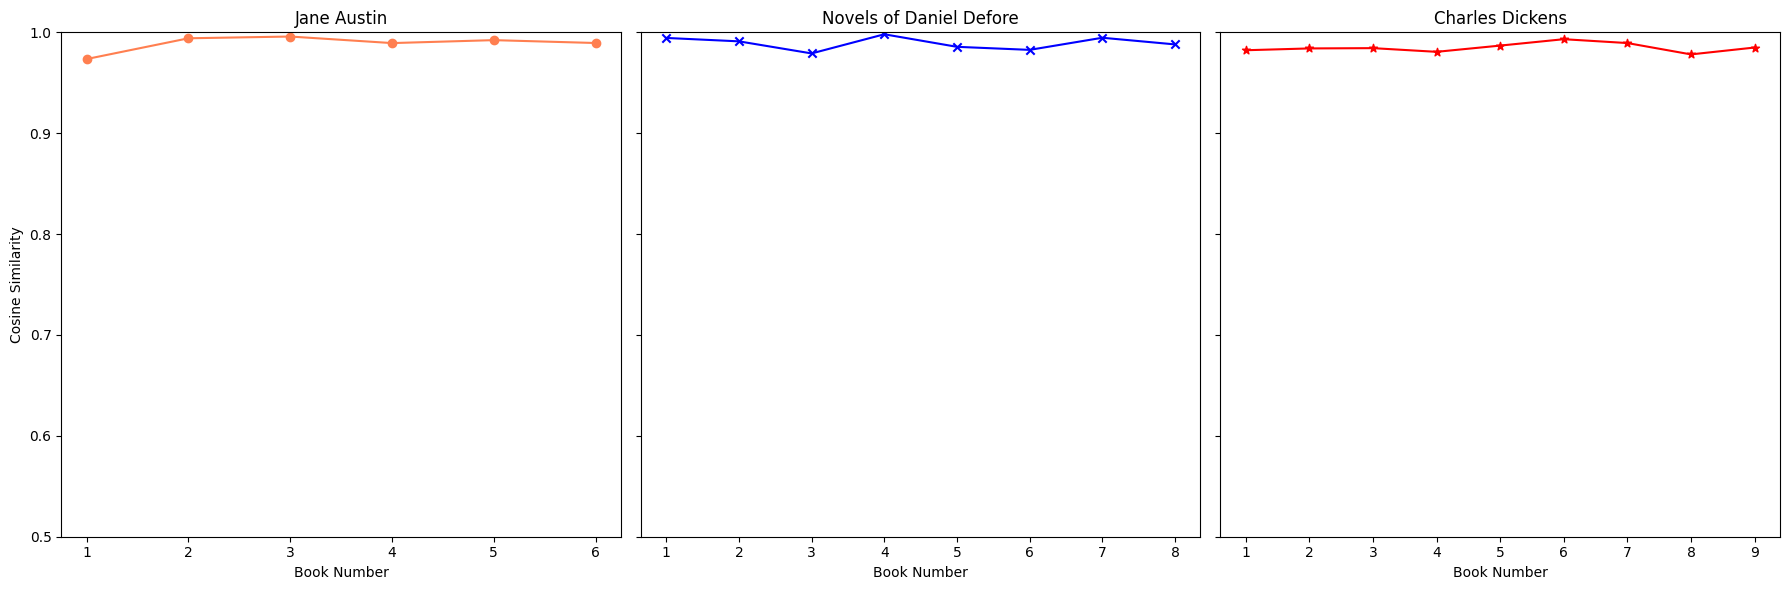

In [116]:
# Example usage:
scatter_plot_with_lines(sim_arr1, sim_arr2, sim_arr3, save_path = '/kaggle/working/Punctuation/punc_matrix_corelation.png')

In [117]:
print(len(pn_matArr1), len(pn_matArr2), len(pn_matArr3))

7 9 10


In [118]:
sim_ar1 = get_cosine_similarity2(pn_matArr1)
sim_ar2 = get_cosine_similarity2(pn_matArr2)
sim_ar3 = get_cosine_similarity2(pn_matArr3)
len(sim_ar1), len(sim_ar2), len(sim_ar3)

(6, 8, 9)

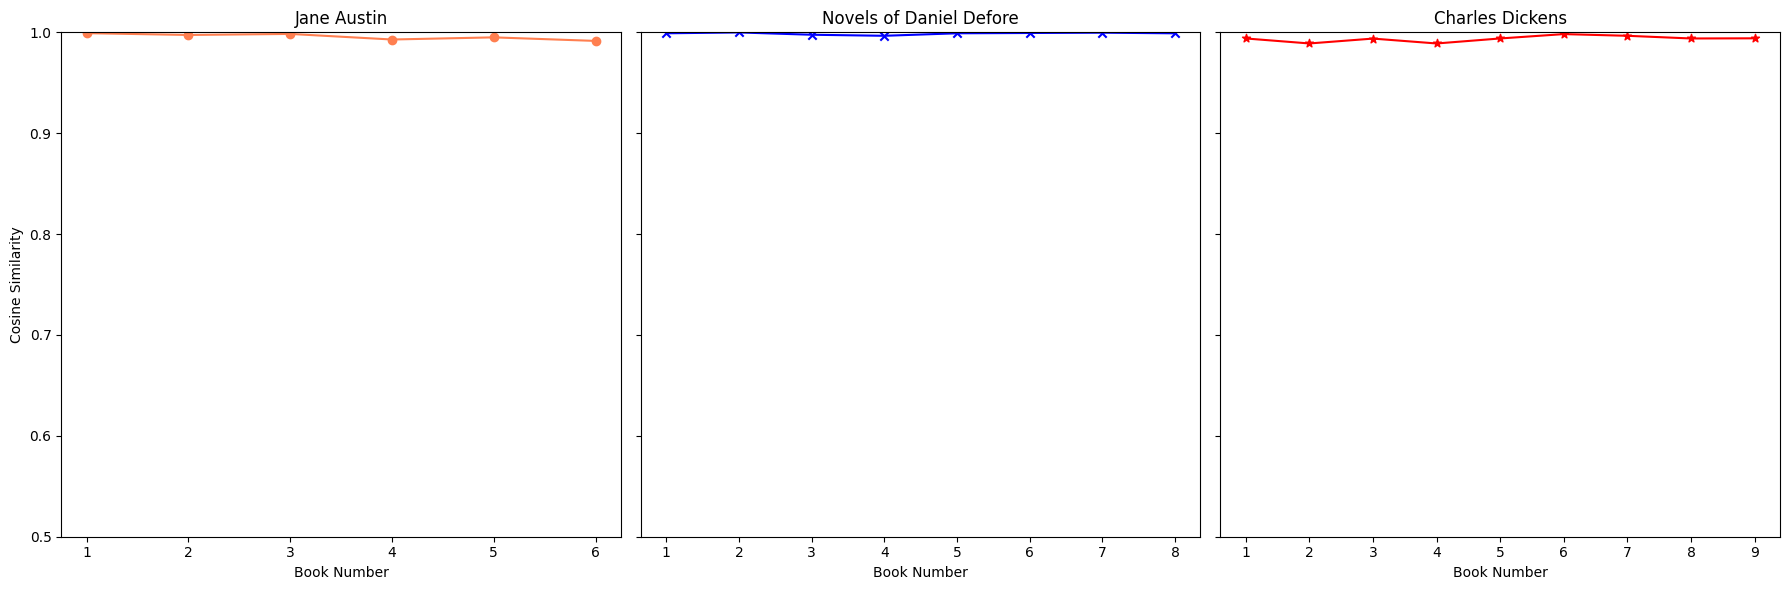

In [119]:
# Example usage:
scatter_plot_with_lines(sim_ar1, sim_ar2, sim_ar3, save_path = '/kaggle/working/Punctuation/punc_state_corelation.png')

In [124]:
# Define number of steps as n
n = 4
# Define k for iterations
k = 6

def plot_the_change_punc(prob1, prob2, prob3, save_path = None):
    x_values = np.array(list(range(1,k+1)))
    labels = ['|', '?', '!', ',']
#     labels = ['A', 'B', 'C', 'D']
    fig, axs = plt.subplots(1, 3, figsize=(18, 9))  
    ylm = 0.9
    
    # Plot first set of prob
    for i in range(len(prob1)):
        axs[0].plot(x_values, prob1[i], marker='o', linestyle='-', label=labels[i], markersize=8)
    axs[0].set_title('Jane Austin' )
    axs[0].set_xlabel('No Of Iteration')
    axs[0].set_ylabel('Probabilities')
#     axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6)
    axs[0].set_ylim([0, ylm])

    # Plot second set of prob
    for i in range(len(prob2)):
        axs[1].plot(x_values, prob2[i], marker='D', linestyle='-', label=labels[i], markersize=6)
    axs[1].set_title('Daniel Defore')
    axs[1].set_xlabel('No Of Iteration')
    axs[1].set_ylabel('Probabilities')
#     axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6)
    axs[1].set_ylim([0, ylm])
    
    # Plot second set of prob
    for i in range(len(prob3)):
        axs[2].plot(x_values, prob3[i], marker='*', linestyle='-', label=labels[i], markersize=10)
    axs[2].set_title('Charles Dickens')
    axs[2].set_xlabel('No Of Iteration')
    axs[2].set_ylabel('Probabilities')
#     axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6)
    axs[2].set_ylim([0, ylm])
    
    # Create a single legend in the middle subplot
    axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=n, prop={'size': 15})


    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

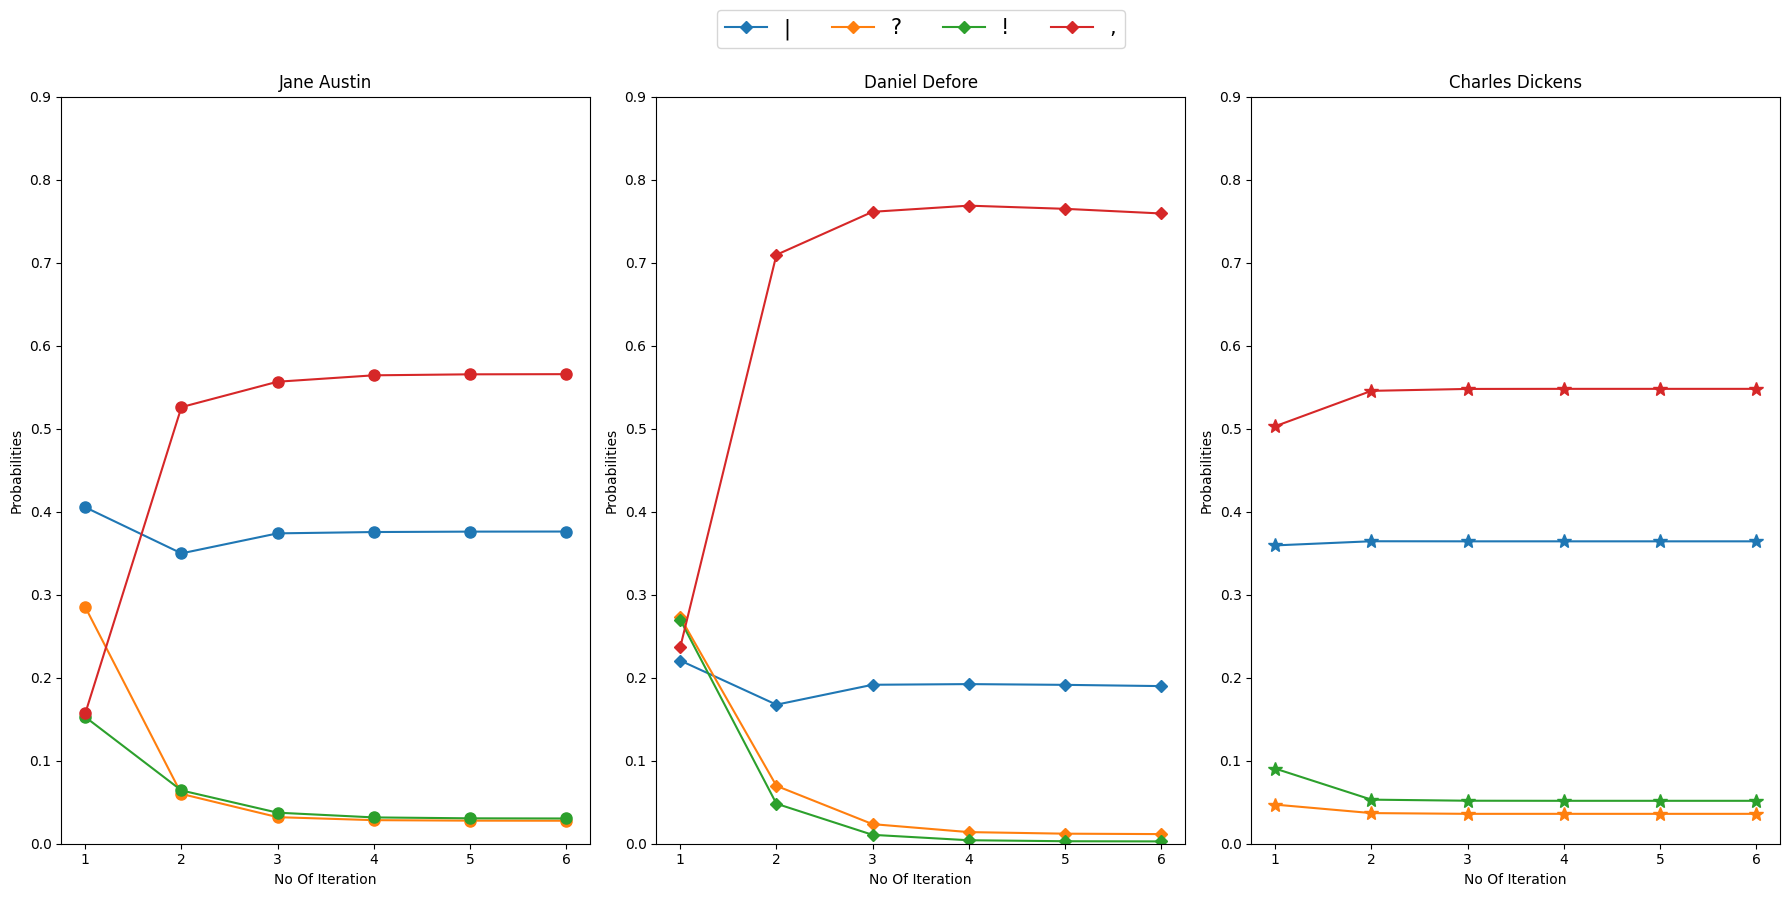

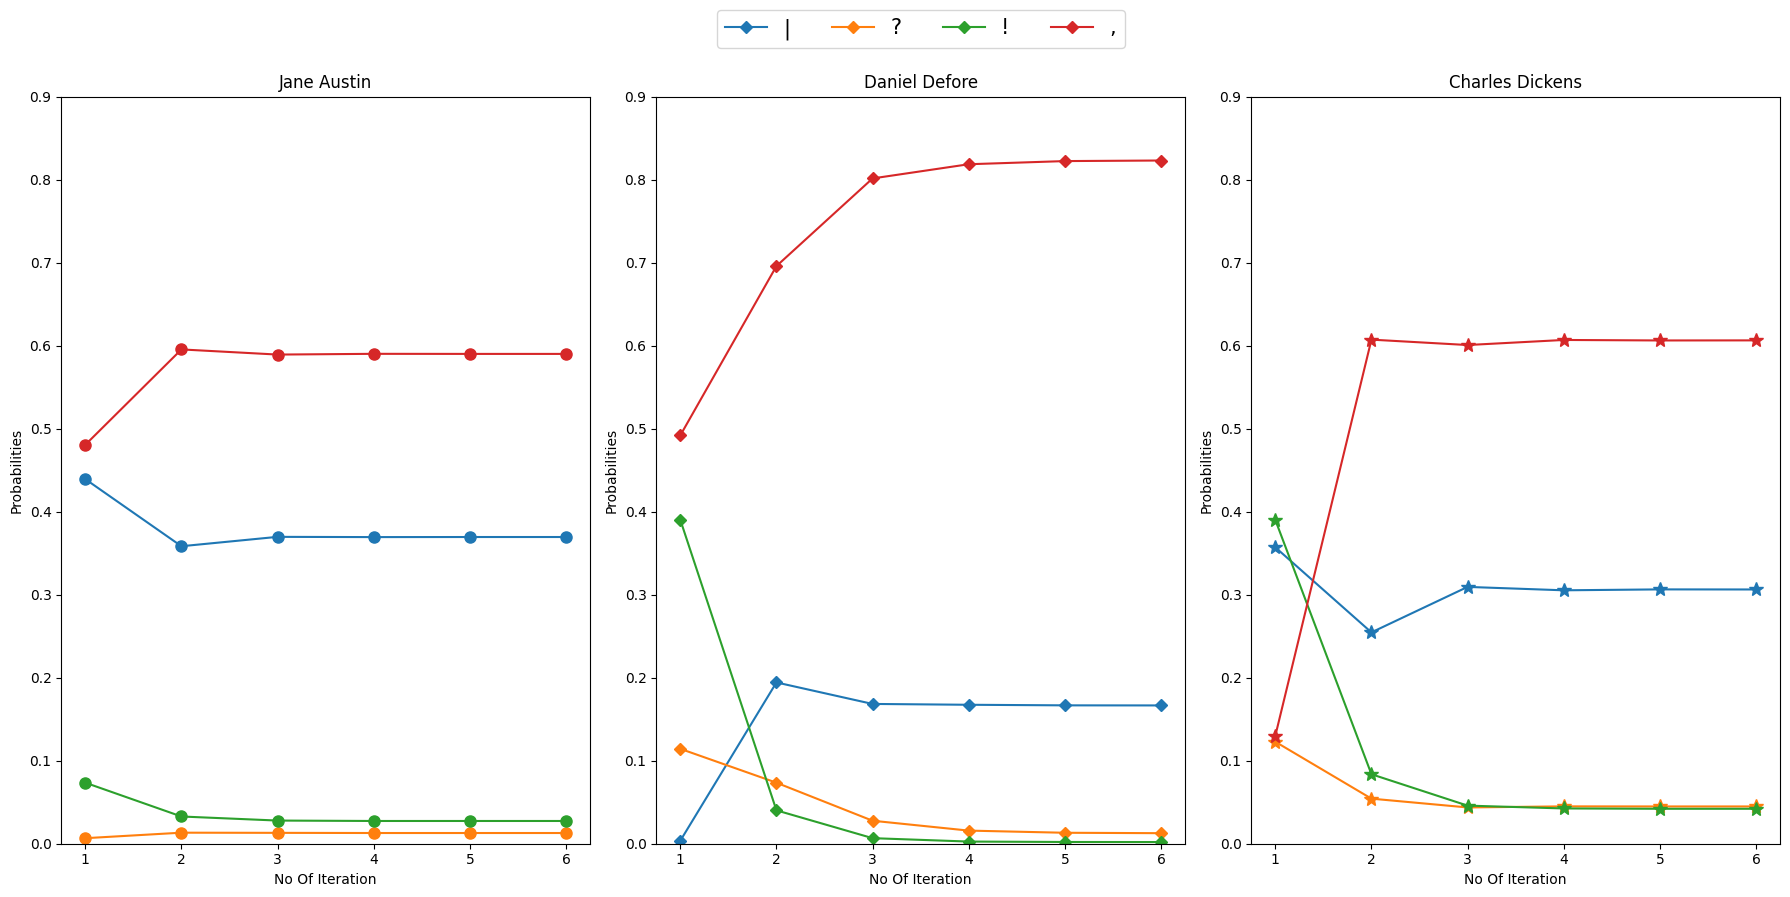

In [125]:
nit = 2
for i in range(nit):
    path = f'/kaggle/working/Punctuation/punc_stState_plot_{i+1}.png'
    array = Punc_showA(pncarr1[i])
    array2 = Punc_showA(pncarr2[i])
    array3 = Punc_showA(pncarr3[i])
    plot_the_change_punc(track_the_change(array), track_the_change(array2), track_the_change(array3), save_path=path)